# EngiTuto

This is a basic tutorial showing how to use EngiBench and interact with problems.

Author: Florian Felten <ffelten@mavt.ethz.ch>

In [1]:
#!pip install -e ".[all]"

## Step 1: Instantiate a Problem

Let us see the Beam bending problem

In [7]:
from engibench.problems.beams2d.v0 import Beams2D
import numpy as np

In [8]:
problem = Beams2D()
problem.reset(9)

## Step 2: Inspect the Problem

### 2.1: Representation, Objectives, Boundary Conditions
The output just below means our beam is represented by 5000 pixels in `[0, 1]`. They are later reshaped as `(100, 50)`.

In [9]:
problem.design_space

Box(0.0, 1.0, (5000,), float32)

In [10]:
problem.possible_objectives

(('c', 'minimize'),)

In [11]:
problem.boundary_conditions

frozenset({('ft', 1),
           ('max_iter', 100),
           ('nelx', 100),
           ('nely', 50),
           ('overhang_constraint', False),
           ('penal', 3.0),
           ('rmin', 2.0),
           ('volfrac', 0.35)})

### 2.2 Data
We can directly access [the dataset linked to the problem](https://huggingface.co/datasets/IDEALLab/beams_2d_v0) doing the following:

In [12]:
problem.dataset

DatasetDict({
    train: Dataset({
        features: ['xPrint', 'nelx', 'nely', 'volfrac', 'penal', 'rmin', 'ft', 'max_iter', 'overhang_constraint', 'compliance'],
        num_rows: 950
    })
    val: Dataset({
        features: ['xPrint', 'nelx', 'nely', 'volfrac', 'penal', 'rmin', 'ft', 'max_iter', 'overhang_constraint', 'compliance'],
        num_rows: 178
    })
    test: Dataset({
        features: ['xPrint', 'nelx', 'nely', 'volfrac', 'penal', 'rmin', 'ft', 'max_iter', 'overhang_constraint', 'compliance'],
        num_rows: 60
    })
})

## Step 3: Creating a Design and Launching the Simulator
While you usually would generate a design based on a generative or surrogate mode, we here show how to play with a rather random one.

In [8]:
my_design, idx = problem.random_design()
my_design.shape

(5000,)

You can also render designs to see what they look like.

(<Figure size 800x400 with 2 Axes>, <Axes: >)

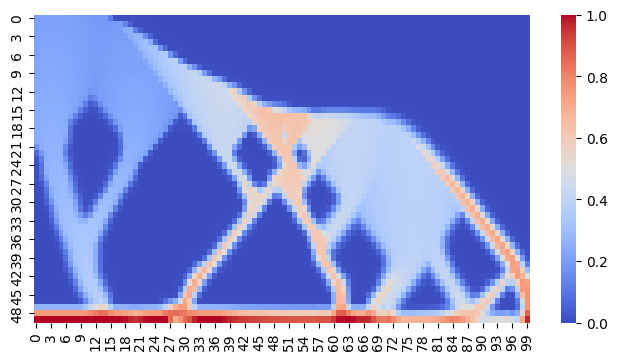

In [9]:
problem.render(my_design)

Finally, you can:
- Simulate a design to get its objective values with `objs = problem.simulate(my_design)`
- Optimize a given design with `optimal_design, objs = problem.optimize(my_design)`

In [10]:
problem.simulate(my_design)

array(2290.3202759)

In [11]:
opt_design, opt_history = problem.optimize(my_design)
opt_history[-1]

ExtendedOptiStep(obj_values=array([127.64329459]), step=100, stored_design=array([1., 1., 1., ..., 1., 1., 1.]))

Now let's see how different is the optimal design from our random design above.

(<Figure size 800x400 with 2 Axes>, <Axes: >)

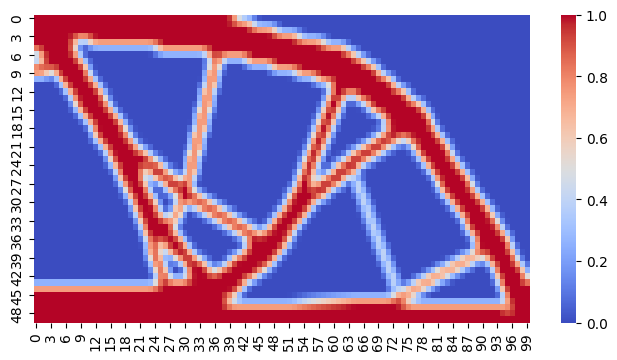

In [12]:
problem.render(opt_design)

In [34]:
opt_design

NameError: name 'opt_design' is not defined

### Check the Dataset Keys:

In [13]:
print(problem.dataset.keys())


dict_keys(['train', 'val', 'test'])


### Access a Specific Subset: If you want to access the training dataset:

In [ ]:
train_data = problem.dataset['train']

### Check Available Features:

In [15]:
print(train_data.features)


{'xPrint': Sequence(feature=Value(dtype='float64', id=None), length=-1, id=None), 'nelx': Value(dtype='int64', id=None), 'nely': Value(dtype='int64', id=None), 'volfrac': Value(dtype='float64', id=None), 'penal': Value(dtype='float64', id=None), 'rmin': Value(dtype='float64', id=None), 'ft': Value(dtype='int64', id=None), 'max_iter': Value(dtype='int64', id=None), 'overhang_constraint': Value(dtype='int64', id=None), 'compliance': Value(dtype='float64', id=None)}


### Retrieve a Single Example:

In [16]:
example = train_data[0]  # First data point
print(example)


{'xPrint': [0.999304928365, 0.881378425882063, 0.658925756614869, 0.33648548524271615, 0.10382824103500744, 1.809360063290959e-05, 9.251863499390145e-07, 2.7224424822678148e-11, 8.716177756853708e-19, 9.153356134356325e-28, 2.203753201439214e-37, 1.382497969787553e-51, 2.773111471661628e-72, 2.552016099177883e-98, 1.4472391664001647e-132, 2.385259387675573e-181, 3.977945026620805e-215, 9.055526775874829e-71, 1.74099013910304e-44, 7.419067546790173e-26, 4.3577627367325417e-10, 0.08997099298644183, 0.30901157769008175, 0.5775923795783539, 0.797948709493085, 0.9909486720680798, 0.8555337612915648, 0.6323227819133143, 0.32612731188121385, 0.10822698429457615, 0.003911691906184406, 0.0007146397769309296, 5.713616922604347e-07, 2.8239287233161266e-12, 2.6911717611934196e-18, 1.689547091591808e-25, 5.11127136430729e-36, 3.2014424199296693e-51, 1.215189264164585e-70, 4.085787311472602e-95, 1.5806507781983642e-126, 1.1778928410703917e-167, 9.223862493621767e-71, 1.7181731027304947e-44, 7.112696

### Extract Features and Labels for CNN Input: If your input consists of numerical values (nelx, nely, etc.), and your target output is an image stored in 'xPrint', you can do:

In [ ]:
input_features = ['nelx', 'nely', 'volfrac', 'penal', 'rmin', 'ft', 'max_iter', 'overhang_constraint', 'compliance']
X = [example[feature] for feature in input_features]
y = example['xPrint']  # The image to reconstruct
# render(self, design: np.ndarray, nelx: int = 100, nely: int = 50, open_window: bool = False)

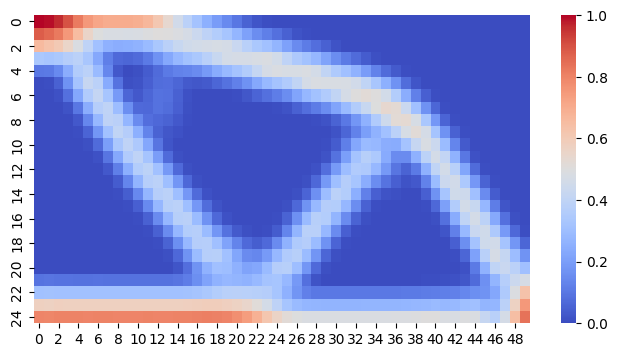

(<Figure size 800x400 with 2 Axes>, <Axes: >)

In [34]:
problem.render(np.array(y),example['nelx'],example['nely'], open_window=True)

### Understanding the problem
You want to train a model that takes numerical inputs (nelx, nely, etc.) and generates an image (xPrint). This is a regression problem where the output is an image.

    Input: A set of numerical values.
    Output: A 2D image (grayscale).
    Goal: Train a model to learn the mapping from input parameters to the image.

### 2. Preprocessing the Data
Before training, we need to properly format the inputs and outputs.
a. Input Preprocessing

    Ensure all numerical inputs are normalized (scaled between 0 and 1 or standardized).
    Convert the inputs into PyTorch tensors.

In [35]:
import torch
import numpy as np

# Example: Normalize the input
def normalize(x, min_val, max_val):
    return (x - min_val) / (max_val - min_val)

input_features = ['nelx', 'nely', 'volfrac', 'penal', 'rmin', 'ft', 'max_iter', 'overhang_constraint', 'compliance']
X = np.array([example[feature] for feature in input_features], dtype=np.float32)
X = normalize(X, np.min(X), np.max(X))  # Normalize

X_tensor = torch.tensor(X, dtype=torch.float32).unsqueeze(0)  # Add batch dimension


In [37]:
y = np.array(example['xPrint'])  # Convert to numpy array

Image Preprocessing

    Convert the xPrint output into a tensor.
    Resize if necessary (e.g., using interpolation).
    Ensure it’s normalized between 0 and 1.

In [ ]:
import torch
import torchvision.transforms as transforms

# Detect device
device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")

# Load and process image tensor
height, width = example['nely'], example['nelx']  # Get image size
y_tensor = torch.tensor(example['xPrint'], dtype=torch.float32)

# Ensure tensor is (C, H, W)
y_tensor = y_tensor.view(1, height, width)

# Resize image
resize = transforms.Resize((64, 64))  # Target size
y_tensor = resize(y_tensor).squeeze(0)  # Convert back to (H, W)

# Move tensor to device
y_tensor = y_tensor.to(device)

# Print confirmation
print(f"Using device: {device}")
print(f"Resized image shape: {y_tensor.shape}")


Using device: mps
Resized image shape: torch.Size([64, 64])


### Building the CNN Model: CNN-AutoEncoder
Since we are reconstructing an image, a CNN-based autoencoder can work well.

In [45]:
import torch
import torch.nn as nn

class CNNModel(nn.Module):
    def __init__(self, input_dim):
        super(CNNModel, self).__init__()
        
        # Fully connected layer to convert input into an image-like tensor
        self.fc = nn.Linear(input_dim, 1024)  # Increase features for better learning
        self.fc_to_image = nn.Sequential(
            nn.ReLU(),
            nn.Linear(1024, 4096),  # Must match 256 * 4 * 4 for reshaping
            nn.ReLU()
        )
        
        # Transposed CNN to upsample to (1, 64, 64)
        self.conv = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2, padding=1, output_padding=1),  # (8,8)
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),   # (16,16)
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1),    # (32,32)
            nn.ReLU(),
            nn.ConvTranspose2d(32, 1, kernel_size=3, stride=2, padding=1, output_padding=1),     # (64,64)
            nn.Sigmoid()  # Normalize output to [0,1]
        )

    def forward(self, x):
        x = self.fc(x)
        x = self.fc_to_image(x)
        x = x.view(-1, 256, 4, 4)  # Reshape to a small image
        x = self.conv(x)
        return x  # Output shape: (batch_size, 1, 64, 64)

# Initialize model
input_dim = len(input_features)  # Number of input features
model = CNNModel(input_dim)


### Training the Model
Use Mean Squared Error (MSE) loss since we are dealing with images.
Use Adam Optimizer.

In [47]:

import torch.optim as optim

# Move tensors to the correct device
device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")
model.to(device)

X_tensor = X_tensor.to(device)
y_tensor = y_tensor.to(device)

# Ensure target shape is (batch_size, 1, 64, 64)
y_tensor = y_tensor.view(1, 1, 64, 64)


# Define loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 100
for epoch in range(epochs):
    optimizer.zero_grad()
    
    # Forward pass
    output = model(X_tensor)
    
    # Compute loss
    loss = criterion(output, y_tensor)
    
    # Backpropagation
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}')

print(f"Training complete! Model running on {device}")



Epoch [0/100], Loss: 0.1436
Epoch [10/100], Loss: 0.0601
Epoch [20/100], Loss: 0.0368
Epoch [30/100], Loss: 0.0225
Epoch [40/100], Loss: 0.0132
Epoch [50/100], Loss: 0.0081
Epoch [60/100], Loss: 0.0050
Epoch [70/100], Loss: 0.0031
Epoch [80/100], Loss: 0.0021
Epoch [90/100], Loss: 0.0015
Training complete! Model running on mps


### Visualization 

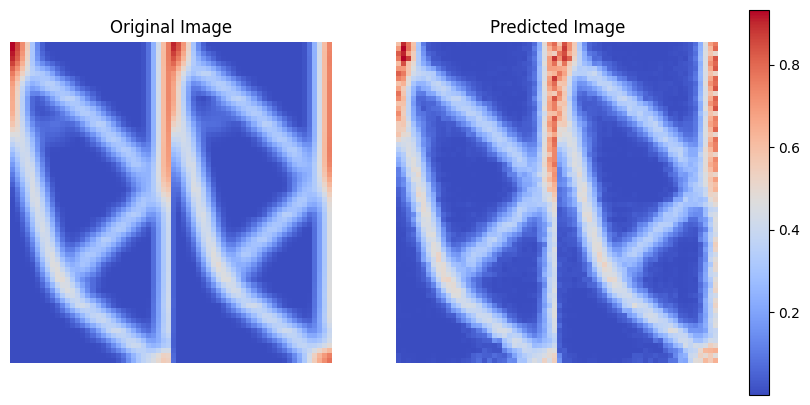

In [49]:
import matplotlib.pyplot as plt

# Get model prediction
with torch.no_grad():
    predicted = model(X_tensor)
    predicted_image = predicted.cpu().squeeze().numpy()  # Convert to NumPy
    original_image = y_tensor.cpu().squeeze().numpy()  # Convert target to NumPy

# Create figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Original Image
axes[0].imshow(original_image, cmap="coolwarm")
axes[0].set_title("Original Image")
axes[0].axis("off")

# Predicted Image
axes[1].imshow(predicted_image, cmap="coolwarm")
axes[1].set_title("Predicted Image")
axes[1].axis("off")

# Show colorbar and display images
plt.colorbar(axes[1].imshow(predicted_image, cmap="coolwarm"), ax=axes, fraction=0.046, pad=0.04)
plt.show()


## Complete Code for full dataset

Using device: mps
Epoch [1/10], Train Loss: 0.2666, Val Loss: 0.2379
Epoch [2/10], Train Loss: 0.2332, Val Loss: 0.2249
Epoch [3/10], Train Loss: 0.2230, Val Loss: 0.2174
Epoch [4/10], Train Loss: 0.2174, Val Loss: 0.2144
Epoch [5/10], Train Loss: 0.2145, Val Loss: 0.2126
Epoch [6/10], Train Loss: 0.2127, Val Loss: 0.2170
Epoch [7/10], Train Loss: 0.2108, Val Loss: 0.2054
Epoch [8/10], Train Loss: 0.2085, Val Loss: 0.2056
Epoch [9/10], Train Loss: 0.2054, Val Loss: 0.2115
Epoch [10/10], Train Loss: 0.2062, Val Loss: 0.2135
Training complete!


/var/folders/wr/hlm5q5sx05j_yrnjr5_7n3p400lkl3/T/ipykernel_12139/833499729.py:186: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model

Final Test Loss: 0.2038


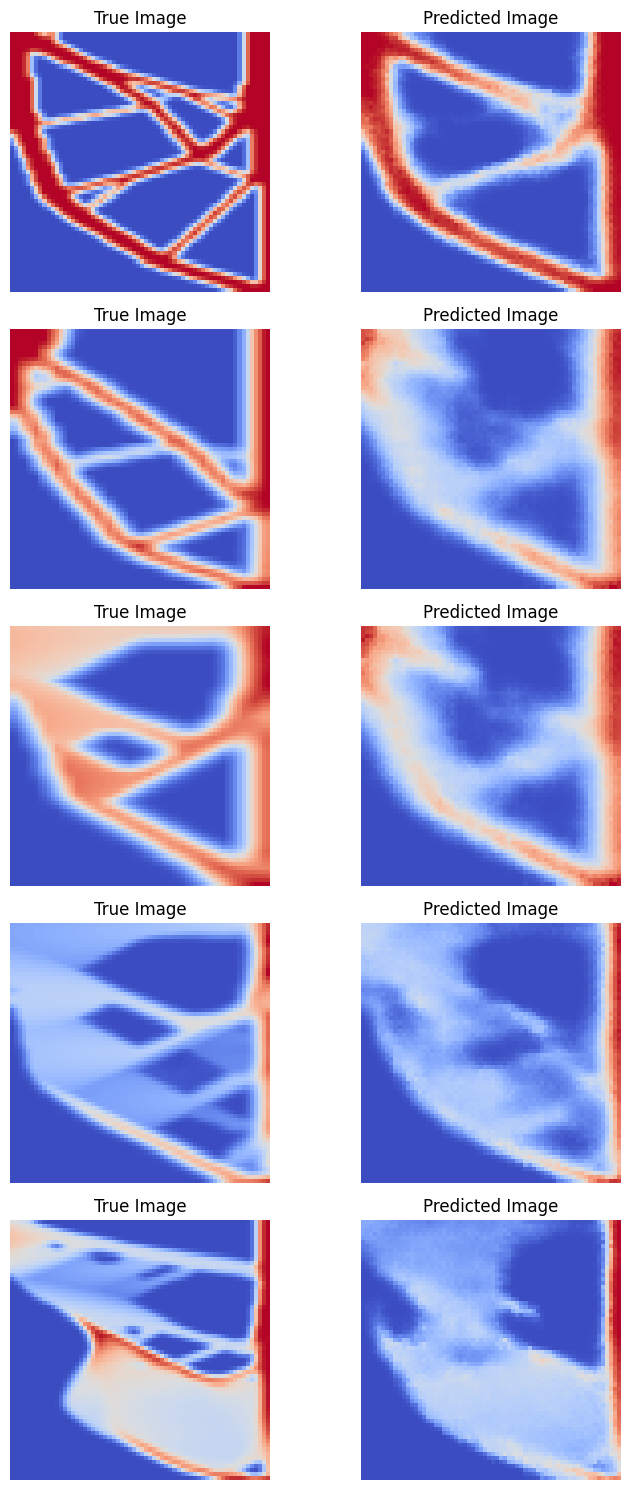

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
from pytorch_msssim import ssim
from engibench.problems.beams2d.v0 import Beams2D

problem = Beams2D()


class CustomLoss(nn.Module):
    def __init__(self, alpha=0.85):
        super(CustomLoss, self).__init__()
        self.alpha = alpha  # Weight for SSIM vs MAE

    def forward(self, pred, target):
        l1_loss = F.l1_loss(pred, target)  # MAE
        ssim_loss = 1 - ssim(pred, target, data_range=1.0)  # SSIM Loss (1 - SSIM)
        return self.alpha * l1_loss + (1 - self.alpha) * ssim_loss  # Weighted combination


# Detect device (GPU, MPS for Mac, or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

# Step 1: Create a PyTorch Dataset
class BeamDataset(Dataset):
    def __init__(self, dataset):
        self.dataset = dataset
        self.input_features = ['nelx', 'nely', 'volfrac', 'penal', 'rmin', 'ft', 'max_iter', 'overhang_constraint', 'compliance']
        
        self.transform = transforms.Compose([
            transforms.Resize((64, 64)),  # Resize first
        ])
    
    def __len__(self):
        return len(self.dataset)
    
    def __getitem__(self, idx):
        example = self.dataset[idx]

        # Load input features
        X = torch.tensor([example[feature] for feature in self.input_features], dtype=torch.float32)

        # Load and preprocess the image target (xPrint)
        y = torch.tensor(example['xPrint'], dtype=torch.float32)

        # Ensure image is shaped as (1, Height, Width)
        height, width = example['nely'], example['nelx']
        y = y.view(1, height, width)

        # Check if image is too wide
        if width > height * 1.5:  # If width is much larger than height, assume duplication
            y = y[:, :, :width // 2]  # Take only the left half

        # Apply resizing
        y = self.transform(y)

        return X, y


# Step 2: Create DataLoaders
############################
batch_size = 8  # More updates per epoch

# Create dataset objects
train_dataset = BeamDataset(problem.dataset['train'])
val_dataset = BeamDataset(problem.dataset['val'])
test_dataset = BeamDataset(problem.dataset['test'])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Step 3: Define the CNN Model
##############################
class CNNModel(nn.Module):
    def __init__(self, input_dim):
        super(CNNModel, self).__init__()

        self.fc = nn.Sequential(
            nn.Linear(input_dim, 1024),
            nn.ReLU(),
            #nn.Dropout(0.1),  # Dropout to prevent overfitting
            nn.Linear(1024, 2048),
            nn.ReLU(),
            nn.Linear(2048, 2048),
            nn.ReLU(),
            nn.Linear(2048, 4096),
            nn.ReLU(),
            #nn.Dropout(0.1)  # Another dropout layer
        )

        self.conv = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 1, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.fc(x)
        x = x.view(-1, 256, 4, 4)
        x = self.conv(x)
        return x

# Initialize model and move to device
input_dim = len(train_dataset.input_features)
model = CNNModel(input_dim).to(device)

# Step 4: Define Training Setup
###############################
# Use the new loss function
criterion = CustomLoss(alpha=0.85)
optimizer = optim.Adam(model.parameters(), lr=0.001)#, weight_decay=1e-4)  # Lower learning rate, weight decay for stability
epochs = 10  # Enough epochs with early stopping
patience = 5  # Stop if val loss does not improve for 10 epochs
best_val_loss = float('inf')
epochs_no_improve = 0

# Step 5: Training Loop with Early Stopping
###########################################
for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        # Forward pass
        optimizer.zero_grad()
        outputs = model(X_batch)

        # Compute loss
        loss = criterion(outputs, y_batch)

        # Backpropagation
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Compute average train loss
    train_loss = running_loss / len(train_loader)

    # ---- Validation Phase ----
    model.eval()
    val_loss = 0.0

    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()

    val_loss /= len(val_loader)

    # Print losses
    print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    # Early stopping check
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_no_improve = 0
        torch.save(model.state_dict(), "best_model.pth")  # Save best model
    else:
        epochs_no_improve += 1

    if epochs_no_improve >= patience:
        print("Early stopping triggered. Training stopped.")
        break

print("Training complete!")

# Step 6: Load Best Model and Evaluate on Test Set
##################################################
model.load_state_dict(torch.load("best_model.pth"))
model.to(device)
model.eval()

test_loss = 0.0

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        test_loss += loss.item()

test_loss /= len(test_loader)
print(f"Final Test Loss: {test_loss:.4f}")

# Step 7: Visualize Test Predictions
####################################
num_samples = 5  # Adjust the number of samples to visualize
test_iter = iter(test_loader)
X_batch, y_batch = next(test_iter)

# Move to device
X_batch, y_batch = X_batch.to(device), y_batch.to(device)

# Generate predictions
with torch.no_grad():
    predictions = model(X_batch)

# Convert to NumPy for visualization
y_batch = y_batch.cpu().numpy()  # True images
predictions = predictions.cpu().numpy()  # Predicted images


def adjust_image(image):
    """Rotates image 90° clockwise and flips it vertically."""
    return np.flipud(np.rot90(image, k=1))  # k=1 means 90° clockwise

# Plot test samples
fig, axes = plt.subplots(num_samples, 2, figsize=(8, num_samples * 3))

for i in range(num_samples):
    # True image (adjusted)
    true_img = adjust_image(y_batch[i].squeeze())
    axes[i, 0].imshow(true_img, cmap="coolwarm")
    axes[i, 0].set_title("True Image")
    axes[i, 0].axis("off")

    # Predicted image (adjusted)
    pred_img = adjust_image(predictions[i].squeeze())
    axes[i, 1].imshow(pred_img, cmap="coolwarm")
    axes[i, 1].set_title("Predicted Image")
    axes[i, 1].axis("off")

plt.tight_layout()
plt.show()



## Better  features + compliance -> Image

In [22]:
import math
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import numpy as np

# For multi-scale SSIM loss (pip install pytorch-msssim)
from pytorch_msssim import ms_ssim

# Your EngiBench problem
from engibench.problems.beams2d.v0 import Beams2D

##############################################################################
# 1. RANDOM CROP & BLACKOUT (no rotation/flip), THEN RESIZE to 64x64
##############################################################################

class RandomCropAndBlackoutThenResize:
    """
    1) With probability p, randomly crop the image to 80–100% of its size.
    2) Then randomly blackout (zero) up to 20% of the area.
    3) Finally, resize to (64,64).

    No flipping or rotation is performed.
    """

    def __init__(self, 
                 crop_scale=(0.8, 1.0),
                 blackout_scale=0.2,
                 p=0.5, 
                 final_size=(64, 64)):
        """
        crop_scale   : (min_scale, max_scale) fraction of the original size to keep when cropping.
        blackout_scale: up to this fraction of image area can be blacked out.
        p            : probability of applying the *crop* step at all.
        final_size   : (height, width) to which we ultimately resize the image.
        """
        self.min_crop, self.max_crop = crop_scale
        self.blackout_scale = blackout_scale
        self.p = p
        self.final_size = final_size

    def random_crop(self, img):
        """
        Randomly crops the image to [min_crop, max_crop] fraction of original size.
        img is (C,H,W).
        """
        c, h, w = img.shape
        scale = random.uniform(self.min_crop, self.max_crop)
        new_h = int(h * scale)
        new_w = int(w * scale)

        if new_h == h and new_w == w:
            return img  # no change

        top = random.randint(0, h - new_h)
        left = random.randint(0, w - new_w)
        return img[:, top:top+new_h, left:left+new_w]

    def random_blackout(self, img):
        """
        Zero out a random rectangle up to blackout_scale * total area.
        """
        c, h, w = img.shape
        area = h * w
        max_erase_area = int(area * self.blackout_scale)
        if max_erase_area < 1:
            return img

        erase_area = random.randint(1, max_erase_area)
        erase_h = random.randint(1, max(1, int(math.sqrt(erase_area))))
        erase_w = erase_area // erase_h
        erase_h = min(erase_h, h)
        erase_w = min(erase_w, w)

        top = random.randint(0, h - erase_h)
        left = random.randint(0, w - erase_w)
        img[:, top:top+erase_h, left:left+erase_w] = 0
        return img

    def __call__(self, img):
        # Possibly crop
        if random.random() < self.p:
            img = self.random_crop(img)
        # Always do blackout
        img = self.random_blackout(img)
        # Finally, resize to 64×64
        # We'll use PyTorch's F.interpolate for that:
        # (batch, c, h, w) is required => unsqueeze batch dim
        with torch.no_grad():
            img_4d = img.unsqueeze(0) # (1, c, h, w)
            img_resized = F.interpolate(
                img_4d, size=self.final_size, mode='bilinear', align_corners=False
            )
            img_resized = img_resized.squeeze(0) # back to (c,64,64)

        return img_resized

##############################################################################
# 2. DATASET: param vector -> resized label image
##############################################################################

class BeamDataset(Dataset):
    """
    - Reads data from problem.dataset['train'/'val'/'test']
    - We only use the 9 scalar parameters as network INPUT
    - The label is the 2D beam image (xPrint), which we resize to 64×64.
    - If 'width >> height', we take the left half of the array, as in your original code.
    - Optionally apply data augmentation transform.
    """

    def __init__(self, data, transform=None):
        self.data = data
        self.input_features = [
            'nelx','nely','volfrac','penal','rmin',
            'ft','max_iter','overhang_constraint','compliance'
        ]
        # We'll always do a final resize to 64×64 for consistency if transform is None
        # so we have a fallback transform
        self.fallback_resize = transforms.Resize((64,64))
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        example = self.data[idx]
        # 1) Extract the 9 parameters
        X_params = torch.tensor(
            [example[feat] for feat in self.input_features],
            dtype=torch.float32
        )
        # 2) Extract the beam image
        height, width = example['nely'], example['nelx']
        y_img = torch.tensor(example['xPrint'], dtype=torch.float32).view(1, height, width)

        # If "too wide," take left half
        if width > 1.5 * height:
            y_img = y_img[:, :, : (width // 2)]

        # If we have a custom transform, apply it (which includes final resizing).
        if self.transform is not None:
            y_img = self.transform(y_img)
        else:
            # Just do a simple fallback resize to 64×64 if no transform
            with torch.no_grad():
                y_img_4d = y_img.unsqueeze(0)  # shape (1,1,H,W)
                y_img_4d = F.interpolate(
                    y_img_4d, size=(64,64), mode='bilinear', align_corners=False
                )
                y_img = y_img_4d.squeeze(0)    # shape (1,64,64)

        return X_params, y_img

##############################################################################
# 3. A SIMPLE DECODER: param -> image (64×64)
##############################################################################

class ParamDecoder(nn.Module):
    """
    A simple "CNN decoder" that maps a 9D param vector into a 64×64 image:
      1) param -> fully connected -> 4096 => reshape to (256,4,4)
      2) trans conv up to (1,64,64)

    You can add more layers or skip connections for advanced usage. 
    (This is more "vanilla" than a U-Net, because you have no input image.)

    We'll also insert a few optional residual blocks to be "more advanced."
    """

    def __init__(self, param_dim=9):
        super().__init__()
        self.param_dim = param_dim

        # 1) Map param -> 4096 => shape (256,4,4)
        self.mlp = nn.Sequential(
            nn.Linear(param_dim, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, 4096),
            nn.ReLU(inplace=True),
        )

        # 2) Start from (256,4,4) and do a chain of transposed conv
        #    We'll do: 256->128 ->(8x8) -> 128->64 ->(16x16) -> 64->32->(32x32)->32->16->(64x64)
        #    Then final ->1 channel, Sigmoid
        self.conv_decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1), # (128,8,8)
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),  # (64,16,16)
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1),   # (32,32,32)
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(32, 16, kernel_size=4, stride=2, padding=1),   # (16,64,64)
            nn.ReLU(inplace=True),
            nn.Conv2d(16, 1, kernel_size=3, padding=1),                       # (1,64,64)
            nn.Sigmoid()  # final pixel values in [0,1]
        )

    def forward(self, x_params):
        """
        x_params: shape (batch_size, 9)
        returns: shape (batch_size, 1, 64, 64)
        """
        bsz = x_params.size(0)
        # Fully connected
        out = self.mlp(x_params)      # (bsz, 4096)
        out = out.view(bsz, 256, 4, 4) # reshape => (bsz,256,4,4)
        out = self.conv_decoder(out)   # => (bsz,1,64,64)
        return out

##############################################################################
# 4. LOSS: L1 + Multi-Scale SSIM
##############################################################################

class MultiScaleSSIM_L1_Loss(nn.Module):
    def __init__(self, alpha=0.85, win_size=3):
        super().__init__()
        self.alpha = alpha
        self.win_size = win_size

    def forward(self, pred, target):
        # pred, target: (B,1,64,64) in [0,1]
        l1_val = F.l1_loss(pred, target)
        ssim_val = ms_ssim(
            pred, target, 
            data_range=1.0, 
            size_average=True, 
            win_size=self.win_size
        )
        ms_ssim_loss = 1.0 - ssim_val
        return self.alpha * l1_val + (1 - self.alpha) * ms_ssim_loss


##############################################################################
# 5. TRAINING LOOP w/ EARLY STOPPING
##############################################################################

def train_model(problem,
                device,
                epochs=10,
                patience=3,
                alpha=0.85,
                lr=1e-4,
                batch_size=8):
    """
    - problem: your Beams2D() instance with problem.dataset splits
    - device : torch.device('cuda'|'mps'|'cpu')
    - epochs : max training epochs
    - patience: early stopping
    - alpha  : weighting for L1 + MS-SSIM
    - lr     : learning rate
    - batch_size: can be > 1 now that all images are forcibly 64x64
    """
    print("Using device:", device)

    # Data augmentation transform
    augment_transform = RandomCropAndBlackoutThenResize(
        crop_scale=(0.8,1.0),
        blackout_scale=0.2,
        p=0.8,  # 80% chance
        final_size=(64,64)
    )

    # Build datasets
    train_dataset = BeamDataset(problem.dataset['train'], transform=augment_transform)
    val_dataset   = BeamDataset(problem.dataset['val'],   transform=None)
    test_dataset  = BeamDataset(problem.dataset['test'],  transform=None)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader   = DataLoader(val_dataset,   batch_size=batch_size, shuffle=False)
    test_loader  = DataLoader(test_dataset,  batch_size=batch_size, shuffle=False)

    # Initialize model
    model = ParamDecoder(param_dim=9).to(device)
    criterion = MultiScaleSSIM_L1_Loss(alpha=0.85, win_size=3)

    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    best_val_loss = float('inf')
    no_improve = 0

    for epoch in range(epochs):
        model.train()
        total_train_loss = 0.0
        for X_params, y_img in train_loader:
            X_params = X_params.to(device)
            y_img = y_img.to(device)

            optimizer.zero_grad()
            y_pred = model(X_params)              # param->(1,64,64)
            loss = criterion(y_pred, y_img)
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()

        train_loss = total_train_loss / len(train_loader)

        # Validation
        model.eval()
        total_val_loss = 0.0
        with torch.no_grad():
            for X_params, y_img in val_loader:
                X_params = X_params.to(device)
                y_img = y_img.to(device)
                y_pred = model(X_params)
                loss = criterion(y_pred, y_img)
                total_val_loss += loss.item()
        val_loss = total_val_loss / len(val_loader)

        print(f"[Epoch {epoch+1}/{epochs}] Train Loss={train_loss:.4f}, Val Loss={val_loss:.4f}")

        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            no_improve = 0
            torch.save(model.state_dict(), "best_model.pth")
        else:
            no_improve += 1
            if no_improve >= patience:
                print("Early stopping triggered!")
                break

    # Load best model from checkpoint
    model.load_state_dict(torch.load("best_model.pth"))

    # Test evaluation
    model.eval()
    total_test_loss = 0.0
    with torch.no_grad():
        for X_params, y_img in test_loader:
            X_params = X_params.to(device)
            y_img = y_img.to(device)
            y_pred = model(X_params)
            loss = criterion(y_pred, y_img)
            total_test_loss += loss.item()
    test_loss = total_test_loss / len(test_loader)
    print("Final Test Loss:", test_loss)

    return model

##############################################################################
# 6. MAIN: put it all together
##############################################################################

if __name__ == "__main__":
    # 1) Create your Beams2D instance
    problem = Beams2D()

    # 2) Detect device: CUDA -> MPS -> CPU
    device = torch.device(
        "cuda" if torch.cuda.is_available() 
        else "mps" if torch.backends.mps.is_available() 
        else "cpu"
    )

    # 3) Train the model
    best_model = train_model(problem,
                             device=device,
                             epochs=500,
                             patience=50,
                             alpha=0.85,
                             lr=1e-3,
                             batch_size=8)

    print("Training complete. Best model saved as best_model.pth.")


Using device: mps
[Epoch 1/500] Train Loss=0.2742, Val Loss=0.2437
[Epoch 2/500] Train Loss=0.2587, Val Loss=0.2325
[Epoch 3/500] Train Loss=0.2513, Val Loss=0.2155
[Epoch 4/500] Train Loss=0.2514, Val Loss=0.2052
[Epoch 5/500] Train Loss=0.2467, Val Loss=0.2094
[Epoch 6/500] Train Loss=0.2451, Val Loss=0.2131
[Epoch 7/500] Train Loss=0.2434, Val Loss=0.2114
[Epoch 8/500] Train Loss=0.2463, Val Loss=0.2068
[Epoch 9/500] Train Loss=0.2410, Val Loss=0.2109
[Epoch 10/500] Train Loss=0.2400, Val Loss=0.2044
[Epoch 11/500] Train Loss=0.2419, Val Loss=0.1958
[Epoch 12/500] Train Loss=0.2371, Val Loss=0.1957
[Epoch 13/500] Train Loss=0.2400, Val Loss=0.1973
[Epoch 14/500] Train Loss=0.2387, Val Loss=0.1995
[Epoch 15/500] Train Loss=0.2377, Val Loss=0.2005
[Epoch 16/500] Train Loss=0.2375, Val Loss=0.1931
[Epoch 17/500] Train Loss=0.2396, Val Loss=0.1960
[Epoch 18/500] Train Loss=0.2376, Val Loss=0.1994
[Epoch 19/500] Train Loss=0.2372, Val Loss=0.2011
[Epoch 20/500] Train Loss=0.2359, Val Los

/var/folders/wr/hlm5q5sx05j_yrnjr5_7n3p400lkl3/T/ipykernel_12139/1800506202.py:326: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_mode

Final Test Loss: 0.1108544198796153
Training complete. Best model saved as best_model.pth.


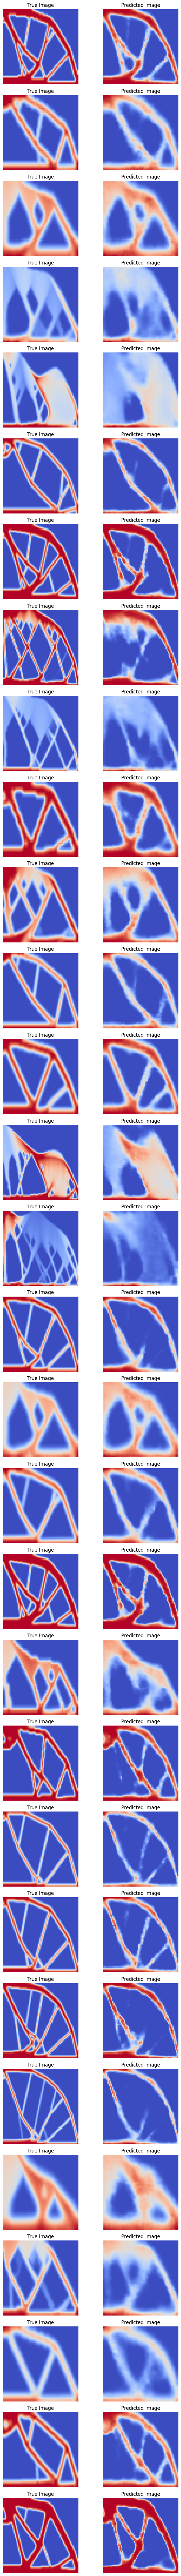

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get all test samples
all_X, all_y, all_predictions = [], [], []
model = best_model
model.eval()
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        # Generate predictions
        predictions = model(X_batch)

        # Move everything to CPU for visualization
        all_X.append(X_batch.cpu())
        all_y.append(y_batch.cpu())
        all_predictions.append(predictions.cpu())

# Concatenate all batches into full test set
all_y = torch.cat(all_y, dim=0).numpy()
all_predictions = torch.cat(all_predictions, dim=0).numpy()

# Define function for rotation & flipping
def adjust_image(image):
    return np.flipud(np.rot90(image, k=1))  # 90° clockwise rotation + vertical flip

# Select how many images to display
num_samples = min(len(all_y), 30)  # Show up to 30 images

# Plot test samples
fig, axes = plt.subplots(num_samples, 2, figsize=(8, num_samples * 3))

for i in range(num_samples):
    # True image
    true_img = adjust_image(all_y[i].squeeze())
    axes[i, 0].imshow(true_img, cmap="coolwarm")
    axes[i, 0].set_title("True Image")
    axes[i, 0].axis("off")

    # Predicted image
    pred_img = adjust_image(all_predictions[i].squeeze())
    axes[i, 1].imshow(pred_img, cmap="coolwarm")
    axes[i, 1].set_title("Predicted Image")
    axes[i, 1].axis("off")

plt.tight_layout()
plt.show()


## Image + features -> compliance

In [37]:
import math
import random
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

import os

# EngiBench import
from engibench.problems.beams2d.v0 import Beams2D

###########################################################################
# 1. HELPER: gather scalars for param & compliance
###########################################################################

def gather_scaler_stats(train_data):
    """
    From the training set, gather:
      - means & stds for [volfrac, rmin, overhang_constraint]
      - means & stds for log(compliance)

    We'll store them so we can consistently transform the val/test sets.
    """
    # 1) param stats
    param_list = []
    # 2) compliance stats in log-space
    comp_log_list = []

    for ex in train_data:
        # param
        vf = float(ex['volfrac'])
        rm = float(ex['rmin'])
        oh = float(ex['overhang_constraint'])  # bool => float(0 or 1)
        param_list.append([vf, rm, oh])

        # compliance in log-space
        c = float(ex['compliance'])
        c = max(c, 1e-12)  # avoid log(0)
        c_log = np.log(c)
        comp_log_list.append(c_log)

    param_arr = np.array(param_list, dtype=np.float32)  # shape (N,3)
    param_means = param_arr.mean(axis=0)
    param_stds  = param_arr.std(axis=0)
    param_stds[param_stds < 1e-8] = 1.0  # avoid div by 0

    comp_log_arr = np.array(comp_log_list, dtype=np.float32)  # shape (N,)
    comp_log_mean = comp_log_arr.mean()
    comp_log_std  = comp_log_arr.std()
    if comp_log_std < 1e-8:
        comp_log_std = 1.0

    scalers = {
        "param_means": param_means,
        "param_stds":  param_stds,
        "comp_log_mean": comp_log_mean,
        "comp_log_std":  comp_log_std
    }
    return scalers

def save_scalers(scalers, filename="scalers.npz"):
    """
    Save param_means, param_stds, comp_log_mean, comp_log_std to a .npz file
    for future usage (inference or next run).
    """
    np.savez(
        filename,
        param_means=scalers["param_means"],
        param_stds=scalers["param_stds"],
        comp_log_mean=np.array([scalers["comp_log_mean"]], dtype=np.float32),
        comp_log_std=np.array([scalers["comp_log_std"]], dtype=np.float32),
    )
    print(f"Scalers saved to {filename}")

def load_scalers(filename="scalers.npz"):
    """
    Load the .npz file and return the scalers dict
    """
    data = np.load(filename)
    scalers = {
        "param_means": data["param_means"],
        "param_stds":  data["param_stds"],
        "comp_log_mean": data["comp_log_mean"][0],  # shape (1,) => scalar
        "comp_log_std":  data["comp_log_std"][0]
    }
    print(f"Scalers loaded from {filename}")
    return scalers

###########################################################################
# 2. DATASET: log-transform compliance, standardize both param & log(c).
###########################################################################

class SurrogateBeamDataset(Dataset):
    """
    For each sample:
      - xPrint: a 1D list of length (nely*nelx). We'll reshape -> (nely,nelx).
      - param: [volfrac, rmin, overhang_constraint].
      - label: log(compliance) => standardized.

    The raw compliance is never directly passed to the model. The dataset
    transforms it to (log(c) - comp_log_mean)/comp_log_std. We'll do MSE in that space.

    We'll also standardize param:
      param[i] -> (param[i] - param_means[i]) / param_stds[i].
    """

    def __init__(self, dataset, scalers, final_size=(64,64)):
        super().__init__()
        self.dataset = dataset
        self.param_means = scalers["param_means"]   # shape (3,)
        self.param_stds  = scalers["param_stds"]    # shape (3,)
        self.comp_log_mean = scalers["comp_log_mean"]
        self.comp_log_std  = scalers["comp_log_std"]

        self.final_size = final_size
        self.param_keys = ['volfrac','rmin','overhang_constraint']

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        ex = self.dataset[idx]

        # 1) Reshape xPrint -> (nely, nelx)
        nely = ex['nely']
        nelx = ex['nelx']
        flat_arr = np.array(ex['xPrint'], dtype=np.float32)
        if flat_arr.size != nely * nelx:
            raise ValueError(f"Mismatch: xPrint size {flat_arr.size} vs nely*nelx {nely*nelx}")
        arr_2d = flat_arr.reshape(nely, nelx)

        beam_2d = torch.tensor(arr_2d) # shape (nely, nelx)
        # If too wide => slice
        if nelx > 1.5 * nely:
            beam_2d = beam_2d[:, : (nelx//2)]
        # add channel dim => (1,nely,nelx)
        beam_2d = beam_2d.unsqueeze(0)

        # Resize to (1,64,64)
        with torch.no_grad():
            beam_2d_4d = beam_2d.unsqueeze(0)  # (1,1,H,W)
            beam_2d_4d = F.interpolate(
                beam_2d_4d, size=self.final_size, mode='bilinear', align_corners=False
            )
            beam_2d = beam_2d_4d.squeeze(0)    # (1,64,64)

        # 2) param => standardize
        param_vals = []
        for i,key in enumerate(self.param_keys):
            raw_val = float(ex[key])
            mean = self.param_means[i]
            std  = self.param_stds[i]
            val_norm = (raw_val - mean)/std
            param_vals.append(val_norm)
        param_vec = torch.tensor(param_vals, dtype=torch.float32) # shape (3,)

        # 3) compliance => log => standardize
        c = float(ex['compliance'])
        c = max(c, 1e-12)  # avoid log(0)
        c_log = math.log(c)
        c_log_norm = (c_log - self.comp_log_mean)/self.comp_log_std
        c_tensor = torch.tensor(c_log_norm, dtype=torch.float32)

        return beam_2d, param_vec, c_tensor

###########################################################################
# 3. MODEL: CNN + MLP param => regression (in log-standardized space)
###########################################################################

class ParamFusionCNN(nn.Module):
    """
    A small CNN backbone for the 64x64 beam image => feature => 
    fused with 3D param => final scalar output (predicted log(c) in standardized space).
    """

    def __init__(self, param_dim=3):
        super().__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),  # -> 32x32

            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),  # -> 16x16

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),  # -> 8x8

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),  # -> 4x4 => shape=(128,4,4)=2048
        )
        self.cnn_out_dim = 128 * 4 * 4

        self.cnn_fc = nn.Sequential(
            nn.Linear(self.cnn_out_dim, 256),
            nn.ReLU(inplace=True),
        )

        self.param_fc = nn.Sequential(
            nn.Linear(param_dim, 32),
            nn.ReLU(inplace=True),
            nn.Linear(32, 32),
            nn.ReLU(inplace=True),
        )

        self.regressor = nn.Sequential(
            nn.Linear(256 + 32, 128),
            nn.ReLU(inplace=True),
            nn.Linear(128, 1)  # final scalar => log(c) in standardized space
        )

    def forward(self, beam_img, param_vec):
        # beam_img: (B,1,64,64), param_vec: (B,3)
        feats = self.cnn(beam_img) # (B,128,4,4)
        feats = feats.view(feats.size(0), -1) # (B,2048)
        feats = self.cnn_fc(feats)            # (B,256)

        p_embed = self.param_fc(param_vec)    # (B,32)
        fused = torch.cat([feats, p_embed], dim=1) # (B,288)
        out = self.regressor(fused)           # (B,1)
        return out.squeeze(1)                 # (B,)

###########################################################################
# 4. TRAINING / TESTING
###########################################################################

def train_surrogate(problem,
                    device,
                    batch_size=8,
                    lr=1e-4,
                    max_epochs=20,
                    patience=5,
                    scaler_file="scalers.npz"):
    """
    1) Gather stats on train set => param means/std, compliance log mean/std.
    2) Save them to disk (scaler_file).
    3) Build SurrogateBeamDataset for train/val/test using those scalers.
    4) Train in standard log space (MSE).
    5) Evaluate on test set, invert the transform => compare with original compliance => 
       compute difference & relative error.
    """

    train_data = problem.dataset['train']
    val_data   = problem.dataset['val']
    test_data  = problem.dataset['test']

    # 1) gather & save scalers
    scalers = gather_scaler_stats(train_data)
    save_scalers(scalers, scaler_file)

    # 2) build datasets / loaders
    train_ds = SurrogateBeamDataset(train_data, scalers)
    val_ds   = SurrogateBeamDataset(val_data,   scalers)
    test_ds  = SurrogateBeamDataset(test_data,  scalers)

    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
    val_loader   = DataLoader(val_ds,   batch_size=batch_size, shuffle=False)
    test_loader  = DataLoader(test_ds,  batch_size=batch_size, shuffle=False)

    # 3) model, loss, optimizer
    model = ParamFusionCNN().to(device)
    criterion = nn.MSELoss()  # MSE in standardized log space
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    best_val_loss = float('inf')
    no_improve = 0

    for epoch in range(max_epochs):
        # ---- Train ----
        model.train()
        total_train_loss = 0.0
        for beam_img, param_vec, comp_log_std in train_loader:
            beam_img    = beam_img.to(device)
            param_vec   = param_vec.to(device)
            comp_log_std= comp_log_std.to(device)

            optimizer.zero_grad()
            pred = model(beam_img, param_vec)  # (B,) => predicted (log(c)-mean)/std
            loss = criterion(pred, comp_log_std)
            loss.backward()
            optimizer.step()

            total_train_loss += loss.item()
        avg_train_loss = total_train_loss/len(train_loader)

        # ---- Val ----
        model.eval()
        total_val_loss = 0.0
        with torch.no_grad():
            for beam_img, param_vec, comp_log_std in val_loader:
                beam_img    = beam_img.to(device)
                param_vec   = param_vec.to(device)
                comp_log_std= comp_log_std.to(device)
                pred = model(beam_img, param_vec)
                loss = criterion(pred, comp_log_std)
                total_val_loss += loss.item()
        avg_val_loss = total_val_loss/len(val_loader)

        print(f"[Epoch {epoch+1}/{max_epochs}] Train MSE={avg_train_loss:.4f}, Val MSE={avg_val_loss:.4f}")

        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            no_improve = 0
            torch.save(model.state_dict(), "best_surrogate_model.pth")
        else:
            no_improve += 1
            if no_improve >= patience:
                print("Early stopping triggered.")
                break

    # load best
    model.load_state_dict(torch.load("best_surrogate_model.pth"))
    model.eval()

    # 4) Test => invert transforms, measure difference & relative error
    param_means = scalers["param_means"]
    param_stds  = scalers["param_stds"]
    c_log_mean  = scalers["comp_log_mean"]
    c_log_std   = scalers["comp_log_std"]

    pred_list, gt_list = [], []

    with torch.no_grad():
        for beam_img, param_vec, c_log_std_gt in test_loader:
            beam_img       = beam_img.to(device)
            param_vec      = param_vec.to(device)
            c_log_std_gt   = c_log_std_gt.to(device)  # shape (B,)

            # predicted standardized log(c)
            pred_std_logc  = model(beam_img, param_vec)  # shape (B,)
            # invert => log(c) in real scale
            pred_logc      = pred_std_logc * c_log_std + c_log_mean
            pred_c         = torch.exp(pred_logc)  # (B,)

            # ground truth c in raw domain => we must invert c_log_std_gt similarly
            # Actually c_log_std_gt is the standardized label => let's invert
            real_logc      = c_log_std_gt * c_log_std + c_log_mean
            real_c         = torch.exp(real_logc)

            pred_list.append(pred_c.cpu().numpy())
            gt_list.append(real_c.cpu().numpy())

    preds = np.concatenate(pred_list, axis=0)
    gts   = np.concatenate(gt_list,  axis=0)

    # compute difference & relative error
    diffs = preds - gts
    rel_errs = diffs / (gts + 1e-12)

    # summarise
    abs_diff_mean = np.mean(np.abs(diffs))
    rel_err_mean  = np.mean(np.abs(rel_errs))

    print("\nTEST RESULTS (unstandardized, unlogged compliance):")
    print(f"Mean absolute difference: {abs_diff_mean:.6f}")
    print(f"Mean absolute relative error: {rel_err_mean:.6f}")

    # Print sample
    print("\nSample predictions vs GT (first 10):")
    for i in range(min(10, len(preds))):
        print(f"i={i}, pred={preds[i]:.4f}, gt={gts[i]:.4f}, diff={diffs[i]:.4f}, rel_err={rel_errs[i]:.4f}")

    return model

###########################################################################
# 5. MAIN
###########################################################################
if __name__ == "__main__":
    problem = Beams2D()

    device = torch.device(
        "cuda" if torch.cuda.is_available()
        else "mps" if torch.backends.mps.is_available()
        else "cpu"
    )
    print("Using device:", device)

    # Train
    model = train_surrogate(
        problem=problem,
        device=device,
        batch_size=8,
        lr=1e-4,
        max_epochs=200,
        patience=20,
        scaler_file="scalers.npz"
    )

    print("\nDone. The best model is saved to best_surrogate_model.pth.")
    print("The input & output scalers are saved to scalers.npz.")


Using device: mps
Scalers saved to scalers.npz
[Epoch 1/200] Train MSE=0.7376, Val MSE=0.3268
[Epoch 2/200] Train MSE=0.2295, Val MSE=0.2024
[Epoch 3/200] Train MSE=0.1664, Val MSE=0.1838
[Epoch 4/200] Train MSE=0.1436, Val MSE=0.1570
[Epoch 5/200] Train MSE=0.1206, Val MSE=0.1213
[Epoch 6/200] Train MSE=0.0941, Val MSE=0.1349
[Epoch 7/200] Train MSE=0.0850, Val MSE=0.1106
[Epoch 8/200] Train MSE=0.0736, Val MSE=0.1032
[Epoch 9/200] Train MSE=0.0672, Val MSE=0.0819
[Epoch 10/200] Train MSE=0.0597, Val MSE=0.0982
[Epoch 11/200] Train MSE=0.0594, Val MSE=0.0674
[Epoch 12/200] Train MSE=0.0459, Val MSE=0.1011
[Epoch 13/200] Train MSE=0.0496, Val MSE=0.0605
[Epoch 14/200] Train MSE=0.0402, Val MSE=0.0531
[Epoch 15/200] Train MSE=0.0356, Val MSE=0.0497
[Epoch 16/200] Train MSE=0.0334, Val MSE=0.0421
[Epoch 17/200] Train MSE=0.0357, Val MSE=0.0928
[Epoch 18/200] Train MSE=0.0353, Val MSE=0.0382
[Epoch 19/200] Train MSE=0.0248, Val MSE=0.0394
[Epoch 20/200] Train MSE=0.0252, Val MSE=0.0318
[E

/var/folders/wr/hlm5q5sx05j_yrnjr5_7n3p400lkl3/T/ipykernel_12139/2582817308.py:318: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_surr

In [38]:
import numpy as np
import torch
from torch.utils.data import DataLoader

# Assuming you already have:
# - problem = Beams2D() or your problem object
# - load_scalers, SurrogateBeamDataset, ParamFusionCNN defined
# - best_surrogate_model.pth for the model
# - scalers.npz file for the scalers

def run_inference_on_whole_test(problem, device="cpu"):
    # 1) Load scalers
    scalers = load_scalers("scalers.npz")

    # 2) Build the full test dataset
    test_dataset = SurrogateBeamDataset(
        dataset=problem.dataset['test'],  # your test data
        scalers=scalers,
        final_size=(64,64)
    )
    
    # 3) Create a DataLoader with batch_size = len(test_dataset) => entire test set at once
    test_loader = DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)

    # 4) Load model
    model = ParamFusionCNN(param_dim=3)
    model.load_state_dict(torch.load("best_surrogate_model.pth", map_location=device))
    model.to(device)
    model.eval()

    # 5) Forward pass on entire test set
    pred_list = []
    gt_list = []

    with torch.no_grad():
        for beam_img, param_vec, c_log_std_gt in test_loader:
            beam_img = beam_img.to(device)
            param_vec = param_vec.to(device)
            c_log_std_gt = c_log_std_gt.to(device)

            # predicted standardized log(c)
            pred_std_logc = model(beam_img, param_vec)  # shape (N,)

            # invert standardization
            pred_logc = pred_std_logc * scalers["comp_log_std"] + scalers["comp_log_mean"]
            pred_c = torch.exp(pred_logc)  # shape (N,)

            # ground truth in real domain
            real_logc = c_log_std_gt * scalers["comp_log_std"] + scalers["comp_log_mean"]
            real_c = torch.exp(real_logc)

            pred_list.append(pred_c.cpu().numpy())
            gt_list.append(real_c.cpu().numpy())

    # 6) Compute diffs and rel errors
    preds = np.concatenate(pred_list, axis=0)
    gts = np.concatenate(gt_list, axis=0)

    diffs = preds - gts
    rel_errs = diffs / (gts + 1e-12)

    mean_abs_diff = np.mean(np.abs(diffs))
    mean_abs_rel_err = np.mean(np.abs(rel_errs))

    print("\n[Whole Test Set] Un-standardized compliance domain results:")
    print(f"Mean absolute difference: {mean_abs_diff:.6f}")
    print(f"Mean absolute relative error: {mean_abs_rel_err:.6f}")
    print(f"Number of test samples: {len(preds)}")

    # Sample listing
    print("\nSample predictions vs GT (first 10):")
    for i in range(min(100, len(preds))):
        print(f"{i} => pred={preds[i]:.4f}, gt={gts[i]:.4f}, "
              f"diff={diffs[i]:.4f}, rel_err={rel_errs[i]:.4f}")

    return preds, gts

# Usage Example:
if __name__ == "__main__":
    from engibench.problems.beams2d.v0 import Beams2D

    problem = Beams2D()

    # Check device
    device = "cuda" if torch.cuda.is_available() else (
        "mps" if torch.backends.mps.is_available() else "cpu"
    )

    # Run
    predictions, ground_truths = run_inference_on_whole_test(problem, device=device)


Scalers loaded from scalers.npz

[Whole Test Set] Un-standardized compliance domain results:
Mean absolute difference: 123.337891
Mean absolute relative error: 0.068693
Number of test samples: 60

Sample predictions vs GT (first 10):
0 => pred=135.2122, gt=132.9263, diff=2.2859, rel_err=0.0172
1 => pred=294.1559, gt=292.3205, diff=1.8354, rel_err=0.0063
2 => pred=253.2420, gt=261.2813, diff=-8.0393, rel_err=-0.0308
3 => pred=673.1188, gt=722.3781, diff=-49.2593, rel_err=-0.0682
4 => pred=542.1764, gt=747.7141, diff=-205.5377, rel_err=-0.2749
5 => pred=361.2462, gt=364.2287, diff=-2.9824, rel_err=-0.0082
6 => pred=116.1058, gt=114.6812, diff=1.4246, rel_err=0.0124
7 => pred=140.3795, gt=135.1888, diff=5.1907, rel_err=0.0384
8 => pred=608.8051, gt=654.5807, diff=-45.7757, rel_err=-0.0699
9 => pred=122.4470, gt=122.0158, diff=0.4312, rel_err=0.0035
10 => pred=164.2663, gt=164.2811, diff=-0.0148, rel_err=-0.0001
11 => pred=479.5537, gt=480.5930, diff=-1.0393, rel_err=-0.0022
12 => pred=156

/var/folders/wr/hlm5q5sx05j_yrnjr5_7n3p400lkl3/T/ipykernel_12139/3484610042.py:27: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_surro

## VAE + SM 

In [41]:
import math
import random
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import os

# EngiBench import
from engibench.problems.beams2d.v0 import Beams2D

###########################################################################
# 1. HELPER FUNCTIONS: Scaler Statistics, Save & Load
###########################################################################

def gather_scaler_stats(train_data):
    """
    From the training set, gather:
      - means & stds for [volfrac, rmin, overhang_constraint]
      - means & stds for log(compliance)
    """
    param_list = []
    comp_log_list = []
    for ex in train_data:
        vf = float(ex['volfrac'])
        rm = float(ex['rmin'])
        oh = float(ex['overhang_constraint'])  # 0 or 1
        param_list.append([vf, rm, oh])
        c = float(ex['compliance'])
        c = max(c, 1e-12)  # avoid log(0)
        comp_log_list.append(np.log(c))
    param_arr = np.array(param_list, dtype=np.float32)  # (N,3)
    param_means = param_arr.mean(axis=0)
    param_stds  = param_arr.std(axis=0)
    param_stds[param_stds < 1e-8] = 1.0

    comp_log_arr = np.array(comp_log_list, dtype=np.float32)  # (N,)
    comp_log_mean = comp_log_arr.mean()
    comp_log_std  = comp_log_arr.std()
    if comp_log_std < 1e-8:
        comp_log_std = 1.0

    scalers = {
        "param_means": param_means,
        "param_stds":  param_stds,
        "comp_log_mean": comp_log_mean,
        "comp_log_std":  comp_log_std
    }
    return scalers

def save_scalers(scalers, filename="scalers.npz"):
    np.savez(
        filename,
        param_means=scalers["param_means"],
        param_stds=scalers["param_stds"],
        comp_log_mean=np.array([scalers["comp_log_mean"]], dtype=np.float32),
        comp_log_std=np.array([scalers["comp_log_std"]], dtype=np.float32),
    )
    print(f"Scalers saved to {filename}")

def load_scalers(filename="scalers.npz"):
    data = np.load(filename)
    scalers = {
        "param_means": data["param_means"],
        "param_stds":  data["param_stds"],
        "comp_log_mean": data["comp_log_mean"][0],
        "comp_log_std":  data["comp_log_std"][0]
    }
    print(f"Scalers loaded from {filename}")
    return scalers

###########################################################################
# 2. DATASET: SurrogateBeamDataset
###########################################################################
class SurrogateBeamDataset(Dataset):
    """
    Each sample:
      - 'xPrint': a 1D list of length (nely*nelx). Reshape to (nely, nelx) then (1, H, W) resized to (1,64,64).
      - param: [volfrac, rmin, overhang_constraint] → standardized.
      - label: log(compliance) → standardized.
    """
    def __init__(self, dataset, scalers, final_size=(64,64)):
        super().__init__()
        self.dataset = dataset
        self.param_means = scalers["param_means"]
        self.param_stds  = scalers["param_stds"]
        self.comp_log_mean = scalers["comp_log_mean"]
        self.comp_log_std  = scalers["comp_log_std"]
        self.final_size = final_size
        self.param_keys = ['volfrac','rmin','overhang_constraint']

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        ex = self.dataset[idx]
        nely = ex['nely']
        nelx = ex['nelx']
        flat_arr = np.array(ex['xPrint'], dtype=np.float32)
        if flat_arr.size != nely * nelx:
            raise ValueError(f"Mismatch: xPrint size {flat_arr.size} vs nely*nelx {nely*nelx}")
        arr_2d = flat_arr.reshape(nely, nelx)
        beam_2d = torch.tensor(arr_2d)  # (nely, nelx)
        if nelx > 1.5 * nely:
            beam_2d = beam_2d[:, : (nelx//2)]
        beam_2d = beam_2d.unsqueeze(0)  # (1, nely, nelx)
        with torch.no_grad():
            beam_2d_4d = beam_2d.unsqueeze(0)  # (1,1,H,W)
            beam_2d_4d = F.interpolate(beam_2d_4d, size=self.final_size, mode='bilinear', align_corners=False)
            beam_2d = beam_2d_4d.squeeze(0)  # (1,64,64)
        param_vals = []
        for i, key in enumerate(self.param_keys):
            raw_val = float(ex[key])
            val_norm = (raw_val - self.param_means[i]) / self.param_stds[i]
            param_vals.append(val_norm)
        param_vec = torch.tensor(param_vals, dtype=torch.float32)  # (3,)
        c = float(ex['compliance'])
        c = max(c, 1e-12)
        c_log = math.log(c)
        c_log_norm = (c_log - self.comp_log_mean) / self.comp_log_std
        c_tensor = torch.tensor(c_log_norm, dtype=torch.float32)
        return beam_2d, param_vec, c_tensor

###########################################################################
# 3. VAE and Surrogate Model
###########################################################################
# 3A. Define the VAE for beam images.
class BeamVAE(nn.Module):
    def __init__(self, latent_dim=32):
        super().__init__()
        self.latent_dim = latent_dim
        # Encoder: similar CNN backbone; input (B,1,64,64) -> (B,128,4,4)
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1),  # 64x64 -> 64x64
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),  # 32x32
            nn.Conv2d(16, 32, kernel_size=3, padding=1),  
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),  # 16x16
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),  # 8x8
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)   # 4x4
        )
        self.encoder_out_dim = 128 * 4 * 4  # 2048
        self.fc_mu = nn.Linear(self.encoder_out_dim, latent_dim)
        self.fc_logvar = nn.Linear(self.encoder_out_dim, latent_dim)
        # Decoder
        self.fc_decoder = nn.Sequential(
            nn.Linear(latent_dim, self.encoder_out_dim),
            nn.ReLU(inplace=True)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),  # 4x4 -> 8x8
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1),   # 8x8 -> 16x16
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(32, 16, kernel_size=4, stride=2, padding=1),   # 16x16 -> 32x32
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(16, 1, kernel_size=4, stride=2, padding=1),    # 32x32 -> 64x64
            nn.Sigmoid()
        )

    def encode(self, x):
        h = self.encoder(x)  # (B,128,4,4)
        h = h.view(h.size(0), -1)  # (B,2048)
        mu = self.fc_mu(h)
        logvar = self.fc_logvar(h)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h = self.fc_decoder(z)  # (B,2048)
        h = h.view(z.size(0), 128, 4, 4)  # (B,128,4,4)
        x_recon = self.decoder(h)  # (B,1,64,64)
        return x_recon

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        x_recon = self.decode(z)
        return x_recon, mu, logvar, z

# 3B. Define the surrogate branch that maps latent code and param to compliance.
class LatentSurrogate(nn.Module):
    def __init__(self, latent_dim=32, param_dim=3):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(latent_dim + param_dim, 128),
            nn.ReLU(inplace=True),
            nn.Linear(128, 1)
        )
    def forward(self, z, param_vec):
        x = torch.cat([z, param_vec], dim=1)
        out = self.fc(x)
        return out.squeeze(1)

# 3C. Joint Model: VAE with Surrogate Prediction.
class VAEWithSurrogate(nn.Module):
    def __init__(self, latent_dim=32, param_dim=3):
        super().__init__()
        self.vae = BeamVAE(latent_dim=latent_dim)
        self.surrogate = LatentSurrogate(latent_dim=latent_dim, param_dim=param_dim)

    def forward(self, x, param_vec):
        # x: beam image (B,1,64,64), param_vec: (B,3)
        x_recon, mu, logvar, z = self.vae(x)
        # For compliance prediction, we use the deterministic latent code (mu)
        compliance_pred = self.surrogate(mu, param_vec)
        return x_recon, mu, logvar, z, compliance_pred

###########################################################################
# 4. LOSS FUNCTION
###########################################################################
def loss_function(x, x_recon, mu, logvar, compliance_pred, target_comp, beta=1.0, gamma=1.0):
    """
    x: original image (B,1,64,64)
    x_recon: reconstructed image
    mu, logvar: from encoder
    compliance_pred: predicted standardized log(compliance)
    target_comp: ground truth standardized log(compliance)
    beta: weight for KL divergence
    gamma: weight for surrogate loss
    """
    recon_loss = F.mse_loss(x_recon, x, reduction="sum")
    KL = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    surrogate_loss = F.mse_loss(compliance_pred, target_comp, reduction="sum")
    total_loss = recon_loss + beta * KL + gamma * surrogate_loss
    return total_loss, recon_loss, KL, surrogate_loss

###########################################################################
# 5. TRAINING FUNCTION: Joint VAE+Surrogate
###########################################################################
def train_joint_model(problem,
                      device,
                      batch_size=8,
                      lr=1e-4,
                      max_epochs=50,
                      patience=10,
                      latent_dim=32,
                      beta=1.0,    # KL weight
                      gamma=1.0,   # surrogate loss weight
                      scaler_file="scalers.npz"):
    """
    1) Gather scalers from train data, save them.
    2) Build datasets (train/val/test) using SurrogateBeamDataset.
    3) Train VAEWithSurrogate using a combined loss.
    4) On test, invert the surrogate prediction to get original compliance,
       and compare with ground truth.
    """
    train_data = problem.dataset['train']
    val_data   = problem.dataset['val']
    test_data  = problem.dataset['test']

    scalers = gather_scaler_stats(train_data)
    save_scalers(scalers, scaler_file)

    train_ds = SurrogateBeamDataset(train_data, scalers)
    val_ds   = SurrogateBeamDataset(val_data, scalers)
    test_ds  = SurrogateBeamDataset(test_data, scalers)

    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
    val_loader   = DataLoader(val_ds, batch_size=batch_size, shuffle=False)
    test_loader  = DataLoader(test_ds, batch_size=batch_size, shuffle=False)

    model = VAEWithSurrogate(latent_dim=latent_dim, param_dim=3).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    best_val_loss = float('inf')
    no_improve = 0

    for epoch in range(max_epochs):
        model.train()
        total_loss_train = 0.0
        for beam_img, param_vec, comp_std in train_loader:
            beam_img = beam_img.to(device)
            param_vec = param_vec.to(device)
            comp_std = comp_std.to(device)
            optimizer.zero_grad()
            x_recon, mu, logvar, z, comp_pred = model(beam_img, param_vec)
            loss, recon_loss, KL, sur_loss = loss_function(beam_img, x_recon, mu, logvar, comp_pred, comp_std, beta, gamma)
            loss.backward()
            optimizer.step()
            total_loss_train += loss.item()
        avg_train_loss = total_loss_train / len(train_loader)

        model.eval()
        total_val_loss = 0.0
        with torch.no_grad():
            for beam_img, param_vec, comp_std in val_loader:
                beam_img = beam_img.to(device)
                param_vec = param_vec.to(device)
                comp_std = comp_std.to(device)
                x_recon, mu, logvar, z, comp_pred = model(beam_img, param_vec)
                loss, _, _, _ = loss_function(beam_img, x_recon, mu, logvar, comp_pred, comp_std, beta, gamma)
                total_val_loss += loss.item()
        avg_val_loss = total_val_loss / len(val_loader)
        print(f"[Epoch {epoch+1}/{max_epochs}] Train Loss={avg_train_loss:.4f}, Val Loss={avg_val_loss:.4f}")
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            no_improve = 0
            torch.save(model.state_dict(), "best_vae_surrogate_model.pth")
        else:
            no_improve += 1
            if no_improve >= patience:
                print("Early stopping triggered.")
                break

    model.load_state_dict(torch.load("best_vae_surrogate_model.pth"))
    model.eval()

    # --- TESTING: Invert surrogate prediction ---
    c_log_mean = scalers["comp_log_mean"]
    c_log_std  = scalers["comp_log_std"]

    pred_list, gt_list = [], []
    with torch.no_grad():
        for beam_img, param_vec, comp_std in test_loader:
            beam_img = beam_img.to(device)
            param_vec = param_vec.to(device)
            comp_std = comp_std.to(device)
            _, mu, _, _, comp_pred = model(beam_img, param_vec)
            # Invert: predicted standardized log(c) -> log(c)
            pred_logc = comp_pred * c_log_std + c_log_mean
            pred_c = torch.exp(pred_logc)
            # Ground truth:
            true_logc = comp_std * c_log_std + c_log_mean
            true_c = torch.exp(true_logc)
            pred_list.append(pred_c.cpu().numpy())
            gt_list.append(true_c.cpu().numpy())
    preds = np.concatenate(pred_list, axis=0)
    gts = np.concatenate(gt_list, axis=0)
    diffs = preds - gts
    rel_errs = diffs / (gts + 1e-12)
    print("\nTEST RESULTS (unstandardized, unlogged compliance):")
    print(f"Mean absolute difference: {np.mean(np.abs(diffs)):.6f}")
    print(f"Mean absolute relative error: {np.mean(np.abs(rel_errs)):.6f}")
    print("\nSample predictions vs GT (first 10):")
    for i in range(min(10, len(preds))):
        print(f"i={i}, pred={preds[i]:.4f}, gt={gts[i]:.4f}, diff={diffs[i]:.4f}, rel_err={rel_errs[i]:.4f}")
    return model

###########################################################################
# 6. MAIN
###########################################################################
if __name__ == "__main__":
    problem = Beams2D()
    device = torch.device("cuda" if torch.cuda.is_available() 
                          else "mps" if torch.backends.mps.is_available() 
                          else "cpu")
    print("Using device:", device)
    model = train_joint_model(
        problem=problem,
        device=device,
        batch_size=8,
        lr=1e-4,
        max_epochs=500,
        patience=50,
        latent_dim=32,
        beta=1.0,
        gamma=1.0,
        scaler_file="scalers.npz"
    )
    print("\nDone. The best model is saved to best_vae_surrogate_model.pth.")
    print("Scalers are saved to scalers.npz.")


Using device: mps
Scalers saved to scalers.npz
[Epoch 1/500] Train Loss=4392.3959, Val Loss=3159.9263
[Epoch 2/500] Train Loss=2794.9399, Val Loss=2431.0788
[Epoch 3/500] Train Loss=2204.4418, Val Loss=1931.4876
[Epoch 4/500] Train Loss=1756.3722, Val Loss=1672.7426
[Epoch 5/500] Train Loss=1558.0647, Val Loss=1525.6390
[Epoch 6/500] Train Loss=1426.7601, Val Loss=1404.3768
[Epoch 7/500] Train Loss=1346.3038, Val Loss=1331.0212
[Epoch 8/500] Train Loss=1269.5911, Val Loss=1275.8747
[Epoch 9/500] Train Loss=1206.7516, Val Loss=1209.8409
[Epoch 10/500] Train Loss=1159.2203, Val Loss=1193.7140
[Epoch 11/500] Train Loss=1121.5601, Val Loss=1141.9981
[Epoch 12/500] Train Loss=1087.4059, Val Loss=1109.6930
[Epoch 13/500] Train Loss=1061.6088, Val Loss=1082.1813
[Epoch 14/500] Train Loss=1034.5592, Val Loss=1058.4432
[Epoch 15/500] Train Loss=1006.6640, Val Loss=1031.6528
[Epoch 16/500] Train Loss=990.8259, Val Loss=1003.8914
[Epoch 17/500] Train Loss=972.8577, Val Loss=996.5111
[Epoch 18/500

/var/folders/wr/hlm5q5sx05j_yrnjr5_7n3p400lkl3/T/ipykernel_12139/668297573.py:317: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_vae_s

Using device: mps
Scalers loaded from scalers.npz


/var/folders/wr/hlm5q5sx05j_yrnjr5_7n3p400lkl3/T/ipykernel_12139/2200307266.py:101: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_vae_

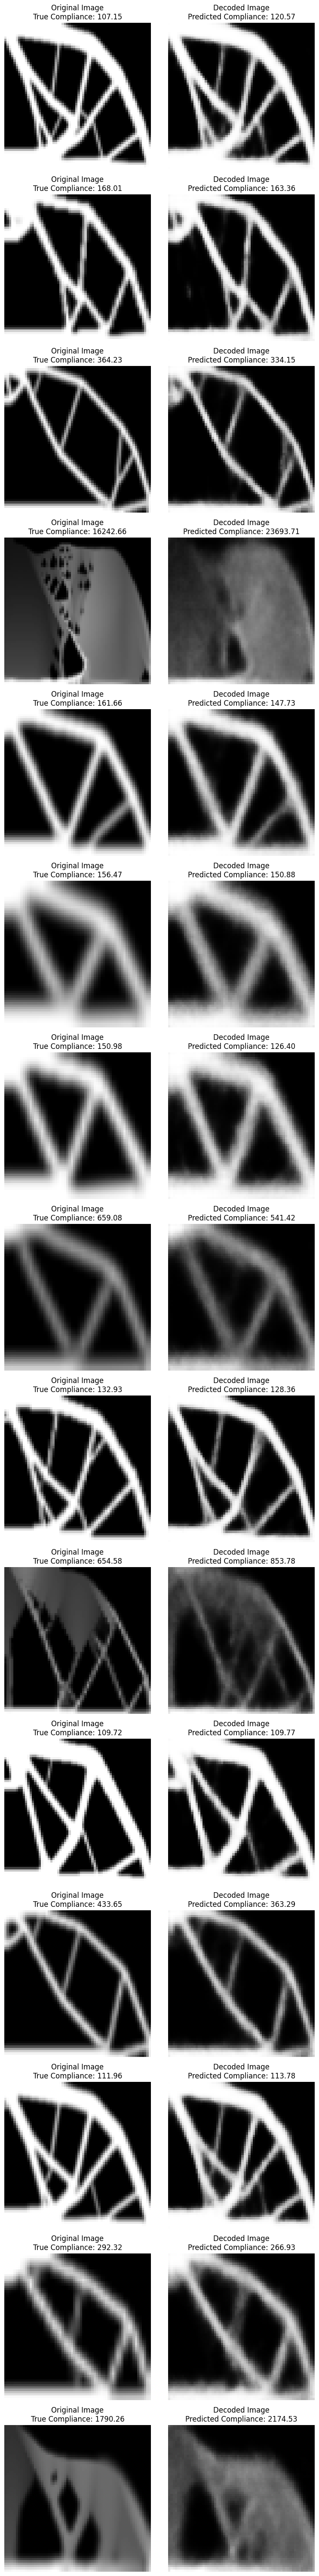

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import DataLoader

# Assuming the following are already defined/imported:
# - load_scalers(filename)
# - SurrogateBeamDataset
# - VAEWithSurrogate
# - problem = Beams2D() is available
# - device is already set (e.g., "cuda" or "cpu")

def adjust_image(image):
    return np.flipud(np.rot90(image, k=1))

def test_and_visualize(model, problem, scalers, device, num_samples=5):
    """
    Runs inference on num_samples test examples and displays:
      - The original (resized) beam image.
      - The VAE reconstructed (decoded) image.
      - The predicted compliance (after inversion) vs. the true compliance.
    """
    # Build the test dataset using the same scalers and resizing to 64x64.
    test_dataset = SurrogateBeamDataset(
        dataset=problem.dataset['test'],
        scalers=scalers,
        final_size=(64, 64)
    )
    # Use a batch size of 1 to easily visualize individual images.
    test_loader = DataLoader(test_dataset, batch_size=1, shuffle=True)
    
    # Get the scalers for compliance inversion.
    c_log_mean = scalers["comp_log_mean"]
    c_log_std = scalers["comp_log_std"]
    
    samples = []
    model.eval()
    with torch.no_grad():
        for i, (beam_img, param_vec, comp_std) in enumerate(test_loader):
            if i >= num_samples:
                break
            beam_img = beam_img.to(device)      # (1,1,64,64)
            param_vec = param_vec.to(device)      # (1,3)
            comp_std = comp_std.to(device)        # (1,)
            
            # Forward pass through the joint model.
            # The model returns: x_recon, mu, logvar, z, compliance_pred.
            # We use x_recon as the decoded image.
            x_recon, mu, logvar, z, comp_pred = model(beam_img, param_vec)
            
            # Invert the surrogate prediction:
            # comp_pred is the predicted standardized log(c).
            pred_logc = comp_pred * c_log_std + c_log_mean
            pred_c = torch.exp(pred_logc).item()
            
            # Invert the ground truth similarly.
            true_logc = comp_std * c_log_std + c_log_mean
            true_c = torch.exp(true_logc).item()
            
            # Get the original beam image and the VAE reconstruction as numpy arrays.
            original_img = beam_img.squeeze(0).squeeze(0).cpu().numpy()  # shape (64,64)
            recon_img = x_recon.squeeze(0).squeeze(0).cpu().numpy()        # shape (64,64)
            
            samples.append((original_img, recon_img, true_c, pred_c))
    
    # Plot each sample: left column = original image with true compliance, right = decoded image with predicted compliance.
    fig, axes = plt.subplots(num_samples, 2, figsize=(8, 4*num_samples))
    if num_samples == 1:
        axes = np.expand_dims(axes, axis=0)
    for i, (orig, recon, true_c, pred_c) in enumerate(samples):
        orig = adjust_image(orig)
        axes[i, 0].imshow(orig, cmap="gray")
        axes[i, 0].set_title(f"Original Image\nTrue Compliance: {true_c:.2f}")
        axes[i, 0].axis("off")
        
        recon = adjust_image(recon)
        axes[i, 1].imshow(recon, cmap="gray")
        axes[i, 1].set_title(f"Decoded Image\nPredicted Compliance: {pred_c:.2f}")
        axes[i, 1].axis("off")
    plt.tight_layout()
    plt.show()



# Example usage:
if __name__ == "__main__":
    # Assume your problem and device are already defined:
    from engibench.problems.beams2d.v0 import Beams2D
    problem = Beams2D()
    
    device = torch.device(
        "cuda" if torch.cuda.is_available() 
        else "mps" if torch.backends.mps.is_available() 
        else "cpu"
    )
    print("Using device:", device)
    
    # Load scalers and model.
    scalers = load_scalers("scalers.npz")
    model = VAEWithSurrogate(latent_dim=32, param_dim=3)
    model.load_state_dict(torch.load("best_vae_surrogate_model.pth", map_location=device))
    model.to(device)
    
    # Run the test/visualization block.
    test_and_visualize(model, problem, scalers, device, num_samples=15)
